In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## week 10-1
### 애니메이션

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import IPython

In [ ]:
k = 6
x = np.linspace(0,10,100)
y = np.sin(0.1*k*x) 
plt.plot(x,y)

k= 1,2,3,...로 바꾸면서 변화하는 그림을 연속으로 출력되게 하여 애니메이션으로 보고 싶다. 따라서

하나의 고정된 그림을 정의하고
그림안의 내용물을 frame에 따라 바꾸는 동작을 정의하여
이들을 결합하는 전략을 생각해보자.

In [ ]:
k = 4
x = np.linspace(0,10,100)
y = np.sin(0.1*k*x) 
fig = plt.figure() # 하나의 고정된 그림을 정의하는 코드 
ax = fig.gca() 
ax.plot(x,y) # 고정된 그림에서 내용물을 frame에 따라서 바꾸는 동작을 정의하는 코드 

- 애니메이션

In [ ]:
fig = plt.figure() # 하나의 고정된 그림을 정의하는 코드 

In [ ]:
def func(frame):
    ax = fig.gca() 
    ax.clear()
    x = np.linspace(0,10,100)
    y = np.sin(0.1*frame*x) 
    ax.plot(x,y) # 고정된 그림에서 내용물을 frame에 따라서 바꾸는 동작을 정의하는 코드 

In [ ]:
ani = matplotlib.animation.FuncAnimation(
    fig, # 하나의 고정된 그림
    func, # 고정된 그림에서 내용물을 frame에 따라서 바꾸는 동작을 함수로 정의하고, 그 함수를 넣음
    frames=50 
)

In [ ]:
display(IPython.display.HTML(ani.to_jshtml()))

## HW

In [ ]:
x = np.linspace(0,10,100)
y = np.sin(5*x) 
plt.plot(x,y)

In [ ]:
fig = plt.figure() # 하나의 고정된 그림을 정의하는 코드 

In [ ]:
def func_hw(frame):
    ax = fig.gca() 
    ax.clear()
    x = np.linspace(0,10,100)
    y = np.sin(5*frame*x) 
    if frame%2==0:
        ax.plot(x,y, color='C0')
    else:
        ax.plot(x,y, color='C1')

In [ ]:
ani = matplotlib.animation.FuncAnimation(
    fig, # 하나의 고정된 그림
    func_hw, # 고정된 그림에서 내용물을 frame에 따라서 바꾸는 동작을 함수로 정의하고, 그 함수를 넣음
    frames=30 
)
display(IPython.display.HTML(ani.to_jshtml()))

## week 10-2
### 의사결정나무
- max depth

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation
import IPython
import sklearn.tree
#---#
import warnings
warnings.filterwarnings('ignore')

In [20]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
eps = np.random.randn(100)*3 # 오차
icecream_sales = 20 + temp * 2.5 + eps 
df_train = pd.DataFrame({'temp':temp,'sales':icecream_sales})
df_train

,temp,sales
0,-4.1,10.900261
1,-3.7,14.002524
2,-3.0,15.928335
3,-1.3,17.673681
4,-0.5,19.463362
...,...,...
95,12.4,54.926065
96,13.4,54.716129
97,14.7,56.194791
98,15.0,60.666163


#### DecisionTreeRegressor (max_depth)

In [32]:
#step1
X = df_train[['temp']]
y = df_train['sales']
#step2
predictr = sklearn.tree.DecisionTreeRegressor(max_depth=2)
#step3
predictr.fit(X,y)
#step4--pass
#predictr.predict(X)

DecisionTreeRegressor(max_depth=2)

결과 시각화

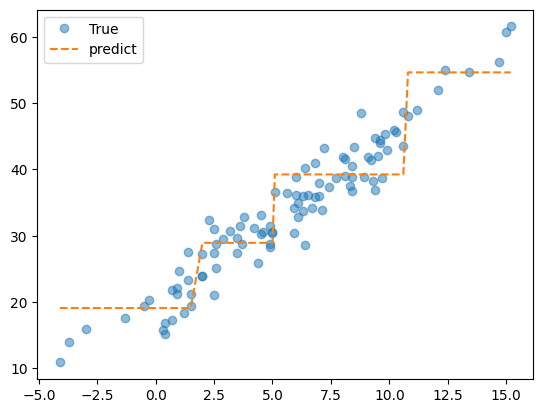

In [33]:
plt.plot(X,y,'o',alpha=0.5,label='True')
plt.plot(X,predictr.predict(X), '--', label='predict')
plt.legend()

[Text(0.5, 0.8333333333333334, 'x[0] <= 5.05\nsquared_error = 111.946\nsamples = 100\nvalue = 33.973'),
 Text(0.25, 0.5, 'x[0] <= 1.75\nsquared_error = 34.94\nsamples = 45\nvalue = 24.788'),
 Text(0.125, 0.16666666666666666, 'squared_error = 15.12\nsamples = 19\nvalue = 19.105'),
 Text(0.375, 0.16666666666666666, 'squared_error = 8.587\nsamples = 26\nvalue = 28.94'),
 Text(0.75, 0.5, 'x[0] <= 10.7\nsquared_error = 49.428\nsamples = 55\nvalue = 41.489'),
 Text(0.625, 0.16666666666666666, 'squared_error = 19.819\nsamples = 47\nvalue = 39.251'),
 Text(0.875, 0.16666666666666666, 'squared_error = 21.051\nsamples = 8\nvalue = 54.638')]

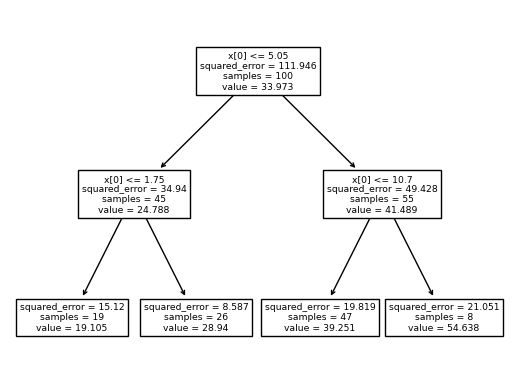

In [34]:
sklearn.tree.plot_tree(predictr)

- 애니메이션

In [40]:
## step1 
X = df_train[['temp']]
y = df_train['sales']
## step2
predictrs = [sklearn.tree.DecisionTreeRegressor(max_depth=k) for k in range(1,11)]
## step3 
for k in range(10):
    predictrs[k].fit(X,y)
## step4 -- pass

In [41]:
fig = plt.figure()
def func(frame):
    ax = fig.gca()
    ax.clear()
    ax.plot(X,y,'o',alpha=0.5) 
    ax.plot(X,predictrs[frame].predict(X),'.--') 
    ax.set_title(f'max_depth={predictrs[frame].max_depth}')

<Figure size 640x480 with 0 Axes>

In [42]:
ani = matplotlib.animation.FuncAnimation(
    fig,
    func,
    frames=10
)
display(IPython.display.HTML(ani.to_jshtml()))